# Import thư viện

In [ ]:
import pandas as pd
import nltk
from nltk import tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string 
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import warnings
warnings.filterwarnings('ignore')

#Các tài nguyên cần thiết cho nltk

In [ ]:

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Tiền Xử lý




## Xử lý missing value





In [ ]:
df = pd.read_csv('churn_dataset.csv')
df = df.dropna()
df

,churn,chat_log,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,Customer: I need a voice upgrade. Can you conn...,SC,73,area_code_415,no,no,0,203.3,45,...,141.9,87,12.06,200.7,71,9.03,8.5,6,2.30,0
2,no,"Customer: A text upgrade, please.\r\nTelCom Ag...",NY,108,area_code_415,no,yes,19,312.4,98,...,271.4,122,23.07,162.6,91,7.32,10.1,6,2.73,0
3,no,Customer: I would like to upgrade my contract ...,PA,101,area_code_415,no,no,0,206.6,105,...,224.9,117,19.12,249.9,100,11.25,14.6,3,3.94,0
5,no,Customer: I have a promotional offer of no add...,DC,139,area_code_510,no,no,0,203.2,81,...,152.5,99,12.96,197.8,76,8.90,9.7,3,2.62,2
6,no,Customer: Voice.\r\nTelCom Agent: Great! And b...,ND,60,area_code_510,no,no,0,203.2,99,...,235.8,131,20.04,224.9,112,10.12,15.1,6,4.08,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,no,Customer: I'd like to upgrade to voice.\r\nTel...,AK,50,area_code_408,no,no,0,183.6,107,...,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1
3329,no,Customer: I have just switched to Verizon and ...,VT,46,area_code_408,no,no,0,196.7,85,...,205.9,74,17.50,216.6,112,9.75,11.2,5,3.02,3
3330,no,Customer: I would like to upgrade my data.\r\n...,DE,12,area_code_415,no,no,0,206.1,105,...,246.6,104,20.96,254.6,83,11.46,12.1,7,3.27,2
3331,no,Customer: I would like to upgrade my service t...,ND,147,area_code_408,no,no,0,205.3,95,...,166.7,128,14.17,240.6,84,10.83,7.8,4,2.11,1


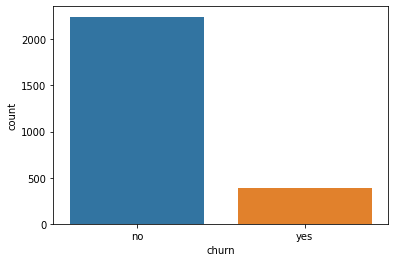

In [ ]:
sbn.countplot(df['churn'])
plt.show()

## Làm sạch dữ liệu

In [ ]:
def preprocess(text):
  lemma = WordNetLemmatizer()
  stopwords_english = stopwords.words('english')  #lấy danh sách từ stopword
  # đổi từ viết tắt thành chữ thường
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"can\'t", "can not", text)
  text = re.sub(r"n\'t", " not", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'s", " is", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\'t", " not", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"\'m", " am", text)


  text=re.sub(r'[^\w]', ' ', text) # xóa ký tự đặc biệt
  text = tokenize.word_tokenize(text) # tách từ
  new_text=[]
  for word in text:
    if word not in stopwords_english:

      new_text.append(lemma.lemmatize(word.lower())) #chuyển về từ nguyên gốc 
  sentence=" ".join(new_text)
  return sentence


Văn bản chưa xử lý 

In [ ]:
df['chat_log'][0] 

"Customer: I need a voice upgrade. Can you connect me to someone who can help me?\r\nTelCom Agent: Yes, sure, send me some information.\r\nCustomer: The only way I can get an upgrade is to upgrade the route from my phone to TelCom's network.\r\nTelCom Agent: Sure, I'll send you that information.\r\nCustomer: This will take me about 3-4 hours.\r\nTelCom Agent: The upgrade will take a couple of days to get to you.\r\nTelCom Agent: And how long do you need to leave your home to perform the upgrade?\r\nCustomer: 2"

Văn bản đã xử lý

In [ ]:
df['chat_log']=df['chat_log'].apply(preprocess)
df['chat_log'][0] 

'customer i need voice upgrade can connect someone help telcom agent yes sure send information customer the way i get upgrade upgrade route phone telcom network telcom agent sure i send information customer this take 3 4 hour telcom agent the upgrade take couple day get telcom agent and long need leave home perform upgrade customer 2'

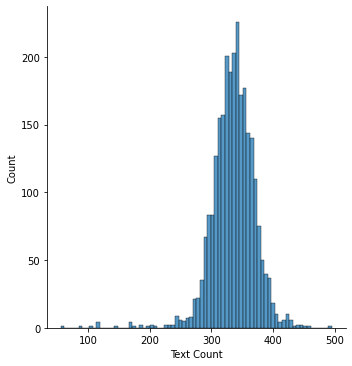

In [ ]:
text_len=[len(text) for text in df['chat_log']]
sbn.displot(text_len)
plt.ylabel('Count')
plt.xlabel('Text Count')
plt.show()

## Chuyển đổi dữ liệu

In [ ]:
label_encoder={'yes':0,'no':1}
df['churn']=df['churn'].map(label_encoder) 
df['churn'].head(10)

0     1
2     1
3     1
5     1
6     1
7     1
9     0
10    1
11    1
12    0
Name: churn, dtype: int64

#Phân lớp dữ liệu

##Train , Test sets

In [ ]:
words = []
for text in df['chat_log']:
  for word in text.split():
    words.append(word)

bag_of_words=set(words)
print(len(bag_of_words))

5175


Chuyển đổi văn bản thành ma trận theo chiều dài bag_of_word chiều

In [ ]:
vectorizer = TfidfVectorizer(max_features=len(bag_of_words))
x = vectorizer.fit_transform(df['chat_log'])
y=df['churn']

In [ ]:
# Tách dữ liệu thành tập train , test 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2108, 5145) (2108,)
(528, 5145) (528,)


## Mô hình Phân lớp Adaboost

In [ ]:
model_Ada = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
model_Ada.fit(x_train,y_train)
y_pred = model_Ada.predict(x_test)
print("Accuracy of Adaboost Classifier is {}%".format(round(accuracy_score(y_pred,y_test)*100,2)))

Accuracy of Adaboost Classifier is 99.05%


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        68
           1       1.00      0.99      0.99       460

    accuracy                           0.99       528
   macro avg       0.97      0.99      0.98       528
weighted avg       0.99      0.99      0.99       528



### Ma trận nhầm lẫn của mô hình phân lớp Adaboost

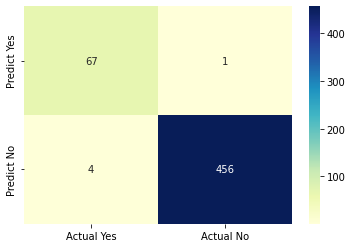

In [ ]:
cm = confusion_matrix(y_test, y_pred)


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Yes', 'Actual No'], 
                        index=['Predict Yes', 'Predict No'])
sbn.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Thử nghiệm mô hình phân lớp Adaboost

In [ ]:
text ="""
Customer: Well, I've been looking at the service and it's still less than I thought it would be. It's terrible. I've been using Comcast for 11 years and I am very happy there. My only problem with their service is that it doesn't work very well for me and I'm looking for something that's a little better.
TelCom Agent: Alright Jeremy, I can tell you that the service that we provide is focused on connecting you with the best Internet connection possible. Our service is now available in over 80 states so that you can get the most out of the Internet connections available. The Internet service we provide offers you fast, reliable and easy to use services that
"""

text_pre = [preprocess(text)] # xử lý văn bản

vec = vectorizer.transform(text_pre) # chuyển sang vector



print('Customer churn prediction: ','Yes' if model_Ada.predict(vec) == 0 else 'No')




Customer churn prediction:  Yes


## Mô hình Phân lớp Naive Bayes

### Kiểu mô hình BernoulliNB

In [ ]:
model_Naive_BernoulliNB = BernoulliNB()
model_Naive_BernoulliNB.fit(x_train,y_train)
y_pred = model_Naive_BernoulliNB.predict(x_test)
print("Accuracy of naive bayes BernoulliNB Classifier is {}%".format(round(accuracy_score(y_pred,y_test)*100,2)))

Accuracy of naive bayes BernoulliNB Classifier is 96.21%


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        68
           1       0.97      0.99      0.98       460

    accuracy                           0.96       528
   macro avg       0.94      0.88      0.91       528
weighted avg       0.96      0.96      0.96       528



#### Ma trận nhầm lẫn mô hình phân lớp Naive Bayes kiểu BernoulliNB

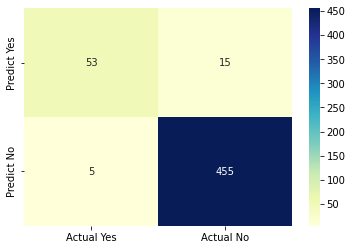

In [ ]:
cm = confusion_matrix(y_test, y_pred)


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Yes', 'Actual No'], 
                        index=['Predict Yes', 'Predict No'])
sbn.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

#### Thử nghiệm mô hình phân lớp Naive Bayes kiểu BernoulliNB

In [ ]:
text ="""
Customer: Let's see … I have the Verizon and Sprint plans. I'm very happy with both and would like to upgrade to the Verizon plan but my current Verizon plan doesn't include the iPhone yet.
TelCom Agent: Sure thing Albert. How long would you be willing to wait for your iPhone to get here, and how much is that plan you have now?
Customer: I'm willing to wait for as long as a month for my iPhone. I have the Verizon plan with unlimited data.
TelCom Agent: Great. What is the total cost to upgrade to the iPhone? And can I change it to a different plan
"""

text_pre = [preprocess(text)] # xử lý văn bản

vec = vectorizer.transform(text_pre) # chuyển sang vector


print('Customer churn prediction: ','Yes' if model_Naive_BernoulliNB.predict(vec) == 0 else 'No')





Customer churn prediction:  No


### Kiểu mô hình GaussianNB

In [ ]:
model_Naive_GaussianNB = GaussianNB()
model_Naive_GaussianNB.fit(x_train.toarray(),y_train)
y_pred = model_Naive_GaussianNB.predict(x_test.toarray())
print("Accuracy of naive bayes GaussianNB Classifier is {}%".format(round(accuracy_score(y_pred,y_test)*100,2)))

Accuracy of naive bayes GaussianNB Classifier is 79.92%


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.26      0.31      0.28        68
           1       0.90      0.87      0.88       460

    accuracy                           0.80       528
   macro avg       0.58      0.59      0.58       528
weighted avg       0.81      0.80      0.81       528



#### Ma trận nhầm lẫn mô hình phân lớp Naive Bayes kiểu GaussianNB

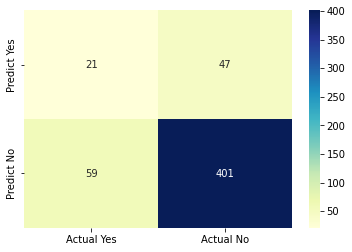

In [ ]:
cm = confusion_matrix(y_test, y_pred)


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Yes', 'Actual No'], 
                        index=['Predict Yes', 'Predict No'])
sbn.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

#### Thử nghiệm mô hình phân lớp Naive Bayes kiểu GaussianNB

In [ ]:
text ="""
Customer: Let's see … I have the Verizon and Sprint plans. I'm very happy with both and would like to upgrade to the Verizon plan but my current Verizon plan doesn't include the iPhone yet.
TelCom Agent: Sure thing Albert. How long would you be willing to wait for your iPhone to get here, and how much is that plan you have now?
Customer: I'm willing to wait for as long as a month for my iPhone. I have the Verizon plan with unlimited data.
TelCom Agent: Great. What is the total cost to upgrade to the iPhone? And can I change it to a different plan
"""

text_pre = [preprocess(text)] # xử lý văn bản

vec = vectorizer.transform(text_pre) # chuyển sang vector


print('Customer churn prediction: ','Yes' if model_Naive_GaussianNB.predict(vec.toarray()) == 0 else 'No')



Customer churn prediction:  No


### Kiểu mô hình MultinomialNB

In [ ]:
model_Naive_MultinomialNB = MultinomialNB()
model_Naive_MultinomialNB.fit(x_train,y_train)
y_pred = model_Naive_MultinomialNB.predict(x_test)
print("Accuracy of naive bayes MultinomialNB Classifier is {}%".format(round(accuracy_score(y_pred,y_test)*100,2)))

Accuracy of naive bayes MultinomialNB Classifier is 87.12%


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.87      1.00      0.93       460

    accuracy                           0.87       528
   macro avg       0.44      0.50      0.47       528
weighted avg       0.76      0.87      0.81       528



#### Ma trận nhầm lẫn mô hình phân lớp Naive Bayes kiểu MultinomialNB

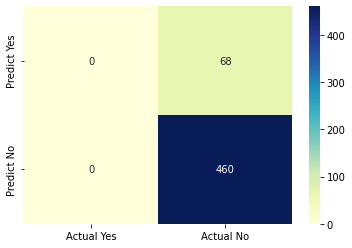

In [ ]:
cm = confusion_matrix(y_test, y_pred)


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Yes', 'Actual No'], 
                        index=['Predict Yes', 'Predict No'])
sbn.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

#### Thử nghiệm mô hình phân lớp Naive Bayes kiểu MultinomialNB

In [ ]:
text ="""
Customer: Let's see … I have the Verizon and Sprint plans. I'm very happy with both and would like to upgrade to the Verizon plan but my current Verizon plan doesn't include the iPhone yet.
TelCom Agent: Sure thing Albert. How long would you be willing to wait for your iPhone to get here, and how much is that plan you have now?
Customer: I'm willing to wait for as long as a month for my iPhone. I have the Verizon plan with unlimited data.
TelCom Agent: Great. What is the total cost to upgrade to the iPhone? And can I change it to a different plan
"""

text_pre = [preprocess(text)] # xử lý văn bản

vec = vectorizer.transform(text_pre) # chuyển sang vector


print('Customer churn prediction: ','Yes' if model_Naive_MultinomialNB.predict(vec) == 0 else 'No')

Customer churn prediction:  No
